Inspired by:
https://colab.research.google.com/github/huggingface/notebooks/blob/main/examples/annotated_diffusion.ipynb#scrollTo=5d751df2
https://colab.research.google.com/drive/1sjy9odlSSy0RBVgMTgP7s99NXsqglsUL?usp=sharing#scrollTo=KOYPSxPf_LL7
https://www.youtube.com/watch?v=a4Yfz2FxXiY
https://medium.com/@fernandopalominocobo/mastering-u-net-a-step-by-step-guide-to-segmentation-from-scratch-with-pytorch-6a17c5916114


In [2]:
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt

In [ ]:
class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, d):
        super().__init__()
        self.d = d

    def forward(self, time):
        PE = math.log(10000) * 2 * (torch.arange(self.d // 2)) / (self.d)


        embeddings = time[:, None] * embeddings[None, :]
        embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)
        return embeddings

In [ ]:
class Block(nn.Module):
    def __init__(self, in_dim, out_dim, groups):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(in_dim, out_dim),
            nn.GroupNorm(groups, out_dim),
            nn.SiLU(),
        )
    def forward(self, x):
        x = self.layers(x)
        return x

class ResnetBlock(nn.Module):    
    def __init__(self, dim, dim_out):
        super().__init__()
        self.time = (
            nn.Sequential(nn.SiLU(), nn.Linear(time_emb_dim, dim_out))
            if exists(time_emb_dim)
            else None
        )

        self.block1 = Block(dim, dim_out, groups=groups)
        self.block2 = Block(dim_out, dim_out, groups=groups)
        self.res_conv = nn.Conv2d(dim, dim_out, 1) if dim != dim_out else nn.Identity()

    def forward(self, x, time_emb=None):
        h = self.block1(x)

        if exists(self.mlp) and exists(time_emb):
            time_emb = self.mlp(time_emb)
            h = rearrange(time_emb, "b c -> b c 1 1") + h

        h = self.block2(h)
        return h + self.res_conv(x)
    
class ConvNextBlock(nn.Module):
    """https://arxiv.org/abs/2201.03545"""

    def __init__(self, dim, dim_out, *, time_emb_dim=None, mult=2, norm=True):
        super().__init__()
        self.mlp = (
            nn.Sequential(nn.GELU(), nn.Linear(time_emb_dim, dim))
            if exists(time_emb_dim)
            else None
        )

        self.ds_conv = nn.Conv2d(dim, dim, 7, padding=3, groups=dim)

        self.net = nn.Sequential(
            nn.GroupNorm(1, dim) if norm else nn.Identity(),
            nn.Conv2d(dim, dim_out * mult, 3, padding=1),
            nn.GELU(),
            nn.GroupNorm(1, dim_out * mult),
            nn.Conv2d(dim_out * mult, dim_out, 3, padding=1),
        )

        self.res_conv = nn.Conv2d(dim, dim_out, 1) if dim != dim_out else nn.Identity()

    def forward(self, x, time_emb=None):
        h = self.ds_conv(x)

        if exists(self.mlp) and exists(time_emb):
            assert exists(time_emb), "time embedding must be passed in"
            condition = self.mlp(time_emb)
            h = h + rearrange(condition, "b c -> b c 1 1")

        h = self.net(h)
        return h + self.res_conv(x)

NameError: name 'Unet' is not defined

In [15]:
class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, d):
        super().__init__()
        self.d = d

    def forward(self, time):
        i = torch.arange(self.d)
        even = 1/2*(1-(-1)**i)
        odd = 1/2*(1+(-1)**i)
        x = 1/torch.exp(math.log(10000) * ((i - i%2) / self.d))
        x = time[:, None] * x[None, :]
        x = torch.sin(even*x) + torch.cos(odd*x)
        return x

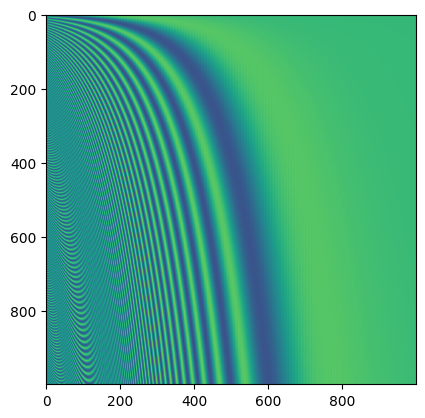

In [16]:
A = SinusoidalPositionEmbeddings(1000)
plt.imshow(A(torch.arange(1000)))

In [21]:
A = nn.Conv2d(5,10,4,2)
B = nn.ConvTranspose2d(10,5,4,2)

In [22]:
x = A(torch.zeros((5,10,10)))
print(x.shape)

torch.Size([10, 4, 4])


In [23]:
y = B(x)
print(y.shape)


torch.Size([5, 10, 10])


In [ ]:
A = ResnetBlock(16, 16, 8)

In [ ]:
x = A(torch.zeros((5,16,32,32)), torch.zeros(5,8))
print(x.shape)

In [ ]:
A = Unet(10, [(5,6), (6,8)])
A(torch.ones((10,3,24, 24)), torch.arange(10))

In [24]:
def add_noise(x):
    noise = torch.randn_like(x)
    return sqrt_alphas_cumprod * x + sqrt_one_minus_alphas_cumprod * noise

In [25]:
img = torch.tensor(cv2.imread("img.jpg", cv2.IMREAD_COLOR)).permute(2,0,1)[0].float()/255*2-1

x = torch.zeros(200, 224, 224)
for i in range(200):
    x[i] = img
a= add_noise(x.permute(1,2,0)).permute(2,0,1)
plt.imshow(a[199])

NameError: name 'cv2' is not defined